In [1]:
import bokeh.io
import bokeh.plotting
bokeh.io.output_notebook()

Loading BokehJS ...

# Q1. How can you create a Bokeh plot using Python code?

1.We start by importing the necessary libraries, including figure and output_file from bokeh.plotting, and show from bokeh.io.

In [2]:
from bokeh.plotting import figure, output_file, show

2.Next, we create some data for our plot, in this case two lists of numbers x and y.

In [3]:
x = [1, 2, 3, 4, 5]
y = [6, 3, 7, 8, 9]


3.We then create an output file for our plot using the output_file function, specifying the name and file type of the output file.

In [4]:
output_file("bokeh_plot.html")

4.We then create a new figure object p with a title and labels for the x and y axis.

In [5]:
p = figure(title="Bokeh Line Plot", x_axis_label='x', y_axis_label='y')

5.Finally, we add a line to the figure using the line method of the figure object, passing in the x and y data, a label for the legend, and specifying the line width.

In [6]:
p.line(x, y, legend_label="Line 1", line_width=2)

GlyphRenderer(id='1038', ...)

6.We then show the plot using the show function.

In [7]:
show(p)

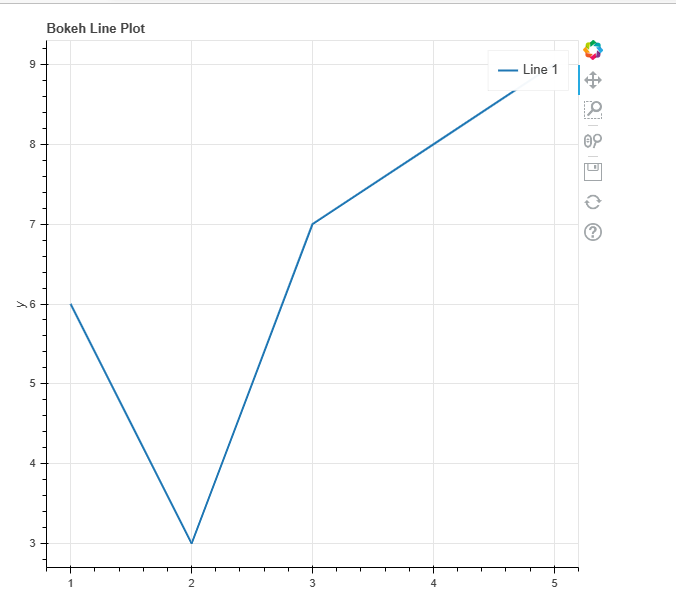

# Q2. What are glyphs in Bokeh, and how can you add them to a Bokeh plot? Explain with an example.

Glyphs are the basic visual building blocks in Bokeh, which represent individual data points in a plot. Bokeh provides a variety of glyphs to choose from, including circles, squares, lines, bars, and many more. Glyphs are added to a plot using the add_glyph() method.

Here's an example of how to add a circle glyph to a Bokeh plot:

In [8]:
p = figure(title="Bokeh Glyphs", x_axis_label='x', y_axis_label='y')
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]
p.circle(x, y, size=10, color='red')
show(p)

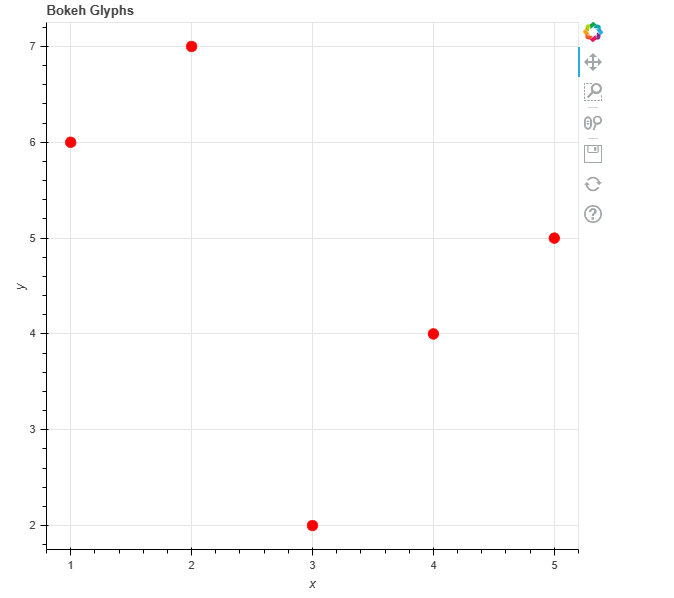

# Q3. How can you customize the appearance of a Bokeh plot, including the axes, title, and legend?

Bokeh provides a wide range of options for customizing the appearance of your plots.

Here are some examples of how you can customize the appearance of a Bokeh plot:

In [9]:
from bokeh.models import Legend
x = [1, 2, 3, 4, 5]
y1 = [6, 7, 2, 4, 5]
y2 = [3, 2, 5, 6, 4]
output_file("bokeh_plot.html")
p = figure(title="Bokeh Line Plot", x_axis_label='x', y_axis_label='y')
p.line(x, y1, legend_label="Line 1", line_width=2, line_color='red')
p.line(x, y2, legend_label="Line 2", line_width=2, line_color='blue')
p.title.text_color = "green"
p.title.text_font_size = "25px"
p.xaxis.axis_label_text_color = "orange"
p.yaxis.axis_label_text_color = "orange"
p.xaxis.major_label_text_color = "purple"
p.yaxis.major_label_text_color = "purple"
p.xaxis.axis_line_width = 3
p.yaxis.axis_line_width = 3
p.xaxis.major_tick_line_width = 2
p.yaxis.major_tick_line_width = 2
p.xaxis.major_tick_line_color = "green"
p.yaxis.major_tick_line_color = "green"
p.legend.label_text_font_size = "14pt"
p.legend.location = "top_left"
show(p)

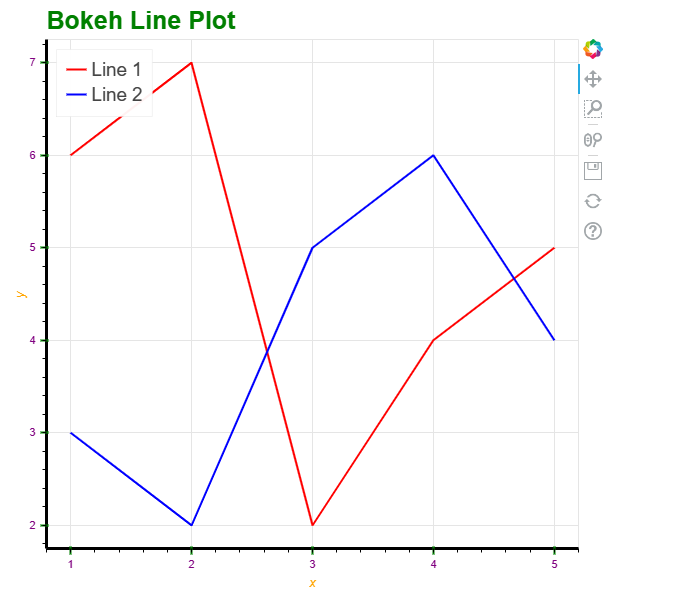

# Q4. What is a Bokeh server, and how can you use it to create interactive plots that can be updated in real time?

A Bokeh server is a Python process that runs a Bokeh application, which is a collection of Bokeh plots and widgets that can be updated in real-time in response to user interaction or data updates. To use the Bokeh server, we can create a Python script that defines your Bokeh application, then start the server using the bokeh serve command.

Here's an example of a simple Bokeh application that updates a line plot in response to a slider widget:

In [10]:
from bokeh.plotting import figure, curdoc
from bokeh.models import Slider
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]
p = figure(title="Bokeh Line Plot", x_axis_label='x', y_axis_label='y')
line = p.line(x, y, line_width=2)
slider = Slider(start=1, end=10, step=0.1, value=1, title="Multiplier")
def update_plot(attrname, old, new):
    line.data_source.data['y'] = [i * slider.value for i in y]
slider.on_change('value', update_plot)
curdoc().add_root(p)
curdoc().add_root(slider)


In [ ]:
bokeh serve app.py

To run this Bokeh application as a server, we can save the code in a file called app.py, then start the Bokeh server by running the following command in your terminal:

# Q5. How can you embed a Bokeh plot into a web page or dashboard using Flask or Django?

To embed a Bokeh plot into a web page or dashboard using Flask or Django, you can use the Bokeh components function, which generates the JavaScript and HTML code needed to display a Bokeh plot in a web page.

Here's an example of how to embed a Bokeh plot into a Flask web application:

In [ ]:
from flask import Flask, render_template
from bokeh.plotting import figure
from bokeh.embed import components
app = Flask(__name__)
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]
p = figure(title="Flask Bokeh Plot", x_axis_label='x', y_axis_label='y')
p.line(x, y, line_width=2)
@app.route('/')
def index():
    script, div = components(p)
    return render_template('index.html', script=script, div=div)
if __name__ == '__main__':
    app.run(debug=True)